## Understanding Probability Distributions

#### Importance in Approximating Real-World Phenomena

In the realm of statistics and data science, probability distributions are invaluable tools for approximating and understanding real-world phenomena. From modeling the heights of individuals in a population to predicting the occurrence of rare events, distributions allow us to make informed decisions, assess risks, and draw meaningful insights from observed data.

#### Bridging the Gap Between Theory and Real-World Phenomena

Probability distributions serve as mathematical models that help us understand and describe the behavior of random variables. They play a pivotal role in **approximating** real-world phenomena. They provide a structured way to describe, model, and manipulate uncertain situations. The elegance of these distributions lies in their mathematical tractability, enabling us to compute probabilities, summarize characteristics, and make predictions with ease.


By mathematical tractability, remember what we saw in class, that every distribution has a *mean* and *variance*, and that we can use these to make predictions about the data. 

### Manipulating Distributions.

In this notbebook, we will resort to a python library called [scipy](https://docs.scipy.org/doc/scipy/reference/stats.html) to manipulate distributions. Scipy is a powerful library that contains a large number of tools for scientific computing. We will use the `scipy.stats` module to manipulate distributions. 

This module contains a large number of *probability distributions classes*: these python objects allow us to generate random samples from a distribution, compute the probability density function (PDF) or probability mass function (PMF) of a distribution, compute the cumulative distribution function (CDF) of a distribution, and compute the quantiles of a distribution.

in each case, these methods are accessed as follows:

```python
from scipy.stats import continuous_distribution_name, discrete_distribution_name
continuous_distribution_name.pdf(x, *args, **kwargs) # Probability density function
continuous_distribution_name.cdf(x, *args, **kwargs) # Cumulative distribution function
continuous_distribution_name.ppf(x, *args, **kwargs) # Percent point function (inverse of cdf — percentiles).
continuous_distribution_name.rvs(*args, **kwargs) # Random variates.
```

```python
from scipy.stats import continuous_distribution_name, discrete_distribution_name
discrete_distribution_name.pmf(x, *args, **kwargs) # Probability mass function
discrete_distribution_name.cdf(x, *args, **kwargs) # Cumulative distribution function
discrete_distribution_name.ppf(x, *args, **kwargs) # Percent point function (inverse of cdf — percentiles).
discrete_distribution_name.rvs(*args, **kwargs) # Random variates.

```


Specifically, we will use the `scipy.stats` module to:

1. Generate random samples from a distribution.
2. Compute the probability density function (PDF) of a distribution.
3. Compute the cumulative distribution function (CDF) of a distribution.
4. Compute the quantiles of a distribution.


## Examples


### 1. The Bernoulli distribution

The Bernoulli distribution is a discrete probability distribution that models the probability of obtaining one of two outcomes (e.g. success or failure) in a single trial.

- The mean of a Bernoulli distribution is $p$.
- The variance of a Bernoulli distribution is $p(1-p)$.


### 2. The Discrete Uniform distribution

The discrete uniform distribution is a symmetric probability distribution whereby a finite number of values are equally likely to be observed; every one of $n$ values has equal probability $1/n$.

The roll of a fair die is an example of a discrete uniform distribution. The die can only take on the values 1, 2, 3, 4, 5, or 6, and each of these outcomes has an equal probability of occurring.
 
- The mean of a discrete uniform distribution is $(a+b)/2$.
- The variance of a discrete uniform distribution is $((b-a+1)^2-1)/12$.


### 1. The binomial distribution

Let's say we have a coin that we flip 10 times. What is the probability that we get 5 heads? 6 heads? 7 heads? 8 heads? 9 heads? 10 heads?

The binomial distribution is a discrete probability distribution that models the probability of obtaining one of two outcomes (e.g. success or failure) in a given number of independent trials.

The binomial distribution is characterized by two parameters: $n$ and $p$. $n$ is the number of trials, and $p$ is the probability of success in each trial. The binomial distribution is defined as follows:

$$P(X = k) = \binom{n}{k}p^k(1-p)^{n-k}$$

where $k$ is the number of successes, $n$ is the number of trials, and $p$ is the probability of success in each trial.

#### Mean and Variance

- The mean of a binomial distribution is $np$.
- The variance of a binomial distribution is $np(1-p)$.

#### Example

Let's look at a plot of the binomial distribution for $n = 10$ and $p = 0.3$ (to deviate from the 50/50 chance of a coin flip).


We will resort to the class `binom` of `scipy.stats` package. This package is capable of determining the Probability Mass Function of a binomial distribution for a set of parameters. 

Notice the use of the `pmf` method of the `binom` class. Binomial outcomes are discrete, so we use the `pmf` method instead of the `pdf` method.




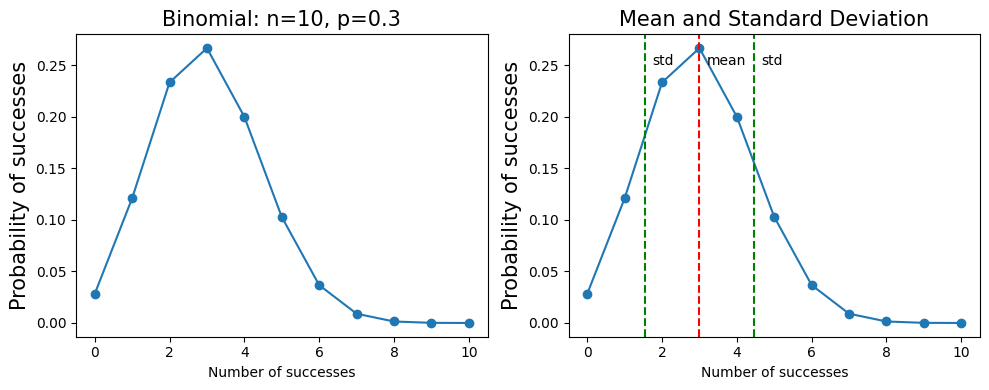

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson
from abc import ABC, abstractmethod
from typing import Optional, Tuple

class Distribution(ABC):

    
    def calculate_pdf_safe(self, number_of_occurrences: Optional[np.ndarray] = None):
        if number_of_occurrences is None:
            number_of_occurrences = self.number_of_occurrences
        return self.calculate_pdf(number_of_occurrences)
    
    @abstractmethod
    def calculate_pdf(self, number_of_occurrences: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
        pass
    
    @property
    @abstractmethod
    def mean(self):
        pass
    
    @property
    @abstractmethod
    def std(self):
        pass

    @property
    @abstractmethod
    def number_of_occurrences(self) -> np.ndarray:
        pass

class BinomialDistribution(Distribution):
    def __init__(self, n, p):
        self.n = n
        self.p = p
        self.title= f'Binomial: n={n}, p={p}'

    def calculate_pdf(self, number_of_occurrences):

        probability_each_success = binom.pmf(number_of_occurrences, self.n, self.p)
        self.title = f'Binomial: n={self.n}, p={self.p}'
        return number_of_occurrences, probability_each_success

    def number_of_occurrences(self):
        return np.arange(0, self.n + 1)
    
    @property
    def mean(self):
        return self.n * self.p
    
    @property
    def std(self):
        return np.sqrt(self.n * self.p * (1 - self.p))

class PoissonDistribution(Distribution):
    def __init__(self, mean):
        self.mean_safe = mean
        self.title = f'Poisson: mean={mean}'
    
    
    def calculate_pdf(self, number_of_occurrences):

        probability_each_success = poisson.pmf(number_of_occurrences, self.mean)
        self.title = f'Poisson: mean={self.mean}'
        return number_of_occurrences, probability_each_success
    
    def number_of_occurrences(self):
        return np.arange(0, self.mean * 2)

    @property
    def std(self):
        return np.sqrt(self.mean)
    
    @property
    def mean(self):
        return self.mean_safe

class DistributionManager:
    def __init__(self, distribution):
        self.distribution: Distribution = distribution
    
    def plot_distribution(self, number_of_occurrences=Optional[np.ndarray]):
        number_of_occurrences, probability_each_success = self.distribution.calculate_pdf_safe(number_of_occurrences)
        
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        
        axs[0].plot(number_of_occurrences, probability_each_success, 'o-')
        axs[0].set_title(self.distribution.title, fontsize=15)
        axs[0].set_xlabel('Number of successes')
        axs[0].set_ylabel('Probability of successes', fontsize=15)
        
        mean = self.distribution.mean
        std = self.distribution.std
        axs[1].plot(number_of_occurrences, probability_each_success, 'o-')
        axs[1].axvline(mean, color='r', linestyle='--', label='mean')
        axs[1].axvline(mean + std, color='g', linestyle='--', label='std')
        axs[1].axvline(mean - std, color='g', linestyle='--')
        axs[1].annotate('mean', xy=(mean, 0.2), xytext=(mean + 0.2, 0.25))
        axs[1].annotate('std', xy=(mean + std, 0.2), xytext=(mean + std + 0.2, 0.25))
        axs[1].annotate('std', xy=(mean - std, 0.2), xytext=(mean - std + 0.2, 0.25))
        axs[1].set_title('Mean and Standard Deviation', fontsize=15)
        axs[1].set_xlabel('Number of successes')
        axs[1].set_ylabel('Probability of successes', fontsize=15)
        
        plt.tight_layout()
        plt.show()

# Example usage
distribution = BinomialDistribution(10, 0.3)
manager = DistributionManager(distribution)

number_of_occurrences=  np.arange(0, 11)
manager.plot_distribution(number_of_occurrences)

Take a moment to understand the plot above (binomial distribution for $n = 10$ and $p = 0.3$). The x-axis represents the number of successes, and the y-axis represents the probability of obtaining that number of successes. For example, the probability of obtaining 3 successes is approximately 0.27.

What is the probability of obtaining 4 successes? What is the most likely number of successes? What is the least likely number of successes?

Let's use the `binom` class of `scipy.stats` to answer these questions.


In [10]:
# use binom class to ask questions about the distribution
n= 10
p= 0.3
dist = binom(n, p)

# what is the probability of getting 4 successes in 10 trials?
print(f"Probability of getting 4 successes in {n} trials: {dist.pmf(4):.4f}")

# what is the least likely number of successes in 10 trials?
number_occurences= np.arange(0, 11, 1)
probability_each_success = dist.pmf(number_occurences)
print(f"Least likely number of successes in {n} trials: {number_occurences[probability_each_success.argmin()]}")



Probability of getting 4 successes in 10 trials: 0.2001
Least likely number of successes in 10 trials: 10


### 2. The Poisson distribution

Imagine that you are running a restaurant, and perhaps planning on renovating. Space is expensive, how much more of it do you need? 

Perhaps then you might like to know how many customers you can expect to serve in a given day. You know that on average, you serve 100 customers per day. But you also know that this number varies from day to day. Some days you serve 90 customers, other days you serve 110 customers. let us say you are conservative, should you plan for 100 or 110 customers? 130? 150? 200?

The Poisson distribution is a discrete probability distribution that models the probability of obtaining a certain number of events within a specified time interval (e.g. the number of customers served in a day) when the average number of events occurring is known (e.g. the average number of customers served per day).

The Poisson distribution is characterized by a single parameter: $\lambda$. $\lambda$ is the average number of events occurring in a given time interval. The Poisson distribution is defined as follows:

$$P(X = k) = \frac{\lambda^ke^{-\lambda}}{k!}$$

where $k$ is the number of events, and $\lambda$ is the average number of events occurring in a given time interval.


#### Mean and Variance

- The mean of a Poisson distribution is $\lambda$.
- The variance of a Poisson distribution is $\lambda$.

#### Example

Let's look at a plot of the Poisson distribution for $\lambda = 100$.



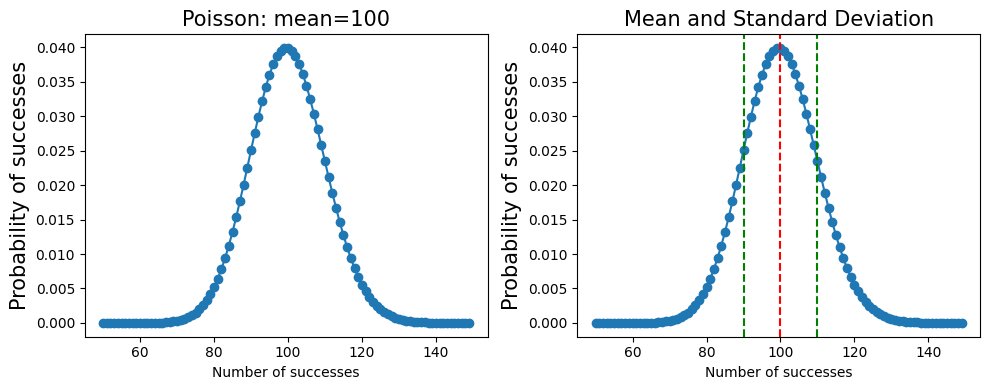

In [15]:
# plot poisson distribution for lambda = 100

from scipy.stats import poisson

# set variables
mu = 100 # mean

# calculate poisson distribution
number_occurences = np.arange(50, 150, 1) # number of successes - this is an array from 0 to 199
probability_each_success = poisson.pmf(number_occurences, mu) # probability of successes - calculated for each number of successes

# plot poisson distribution
distribution = PoissonDistribution(100)
manager = DistributionManager(distribution)
manager.plot_distribution(number_occurences)
